<a href="https://colab.research.google.com/github/mhalikhani7/my-data-science-journey/blob/main/My-First-Step/Learning_ds_spacex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
def plot_confusion_matrix(y,y_predict):
  """This function plots the confusion_matrix"""
  from sklearn.metrics import confusion_matrix

  cm=confusion_matrix(y,y_predict)
  ax=plt.subplot()
  sns.heatmap(cm,annot=True,ax=ax)
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel("True labels")
  ax.set_title('Confusion Matrix')
  ax.xaxis.set_ticklabels(['did not land','land'])
  ax.yaxis.set_ticklabels(['did not land','landed'])


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Preprocessed_dataset (1) (1).csv to Preprocessed_dataset (1) (1).csv


In [ ]:
preprocessed=pd.read_csv('Preprocessed_dataset (1) (1).csv')

In [ ]:
data=pd.read_csv("Preprocessed_dataset (1) (1).csv")

In [ ]:
preprocessed.head(100)

,Unnamed: 0.1,Unnamed: 0,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Class,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,0,0,6104.959412,1,0,0,0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,525.000000,1,0,0,0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,677.000000,1,0,0,0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,500.000000,1,0,0,0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,3170.000000,1,0,0,0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,85,85,15400.000000,2,1,1,1,5.0,2,1,...,0,0,0,0,0,0,0,0,1,0
86,86,86,15400.000000,3,1,1,1,5.0,2,1,...,0,0,0,0,0,0,1,0,0,0
87,87,87,15400.000000,6,1,1,1,5.0,5,1,...,0,0,0,1,0,0,0,0,0,0
88,88,88,15400.000000,3,1,1,1,5.0,2,1,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
data['PayloadMass'].mean()

np.float64(6104.959411764707)

In [ ]:
data['PayloadMass'].std()

4694.671719712728

In [ ]:
data['Flights'].mean()

np.float64(1.788888888888889)

In [ ]:
data['Flights'].std()

1.2131715741866367

In [ ]:
X=data.drop('Class',axis=1)
y=data['Class']

In [ ]:
print(X.dtypes)  # نمایش نوع داده‌های هر ستون


Unnamed: 0.1      int64
Unnamed: 0        int64
PayloadMass     float64
Flights           int64
GridFins          int64
                 ...   
Serial_B1056      int64
Serial_B1058      int64
Serial_B1059      int64
Serial_B1060      int64
Serial_B1062      int64
Length: 89, dtype: object


In [ ]:
from sklearn import preprocessing
transform=preprocessing.StandardScaler()
X_scaled=transform.fit_transform(X)
X_scaled

array([[-1.71291154e+00, -1.71291154e+00, -1.94814463e-16, ...,
        -2.15665546e-01, -1.85695338e-01, -1.05999788e-01],
       [-1.67441914e+00, -1.67441914e+00, -1.19523159e+00, ...,
        -2.15665546e-01, -1.85695338e-01, -1.05999788e-01],
       [-1.63592675e+00, -1.63592675e+00, -1.16267307e+00, ...,
        -2.15665546e-01, -1.85695338e-01, -1.05999788e-01],
       ...,
       [ 1.63592675e+00,  1.63592675e+00,  1.99100483e+00, ...,
        -2.15665546e-01, -1.85695338e-01, -1.05999788e-01],
       [ 1.67441914e+00,  1.67441914e+00,  1.99100483e+00, ...,
        -2.15665546e-01,  5.38516481e+00, -1.05999788e-01],
       [ 1.71291154e+00,  1.71291154e+00, -5.19213966e-01, ...,
        -2.15665546e-01, -1.85695338e-01,  9.43398113e+00]])

In [ ]:
col=X.columns
X=pd.DataFrame(X_scaled,columns=col)
X

,Unnamed: 0.1,Unnamed: 0,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,-1.712912,-1.712912,-1.948145e-16,-0.653913,-1.870829,-0.835532,-1.933091,-1.575895,-0.973440,-0.106,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000
1,-1.674419,-1.674419,-1.195232e+00,-0.653913,-1.870829,-0.835532,-1.933091,-1.575895,-0.973440,-0.106,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000
2,-1.635927,-1.635927,-1.162673e+00,-0.653913,-1.870829,-0.835532,-1.933091,-1.575895,-0.973440,-0.106,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000
3,-1.597434,-1.597434,-1.200587e+00,-0.653913,-1.870829,-0.835532,-1.933091,-1.575895,-0.973440,-0.106,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000
4,-1.558942,-1.558942,-6.286706e-01,-0.653913,-1.870829,-0.835532,-1.933091,-1.575895,-0.973440,-0.106,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1.558942,1.558942,1.991005e+00,0.174991,0.534522,1.196843,0.517306,0.945537,0.202528,-0.106,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,5.385165,-0.106000
86,1.597434,1.597434,1.991005e+00,1.003894,0.534522,1.196843,0.517306,0.945537,0.202528,-0.106,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,5.385165,-0.215666,-0.185695,-0.106000
87,1.635927,1.635927,1.991005e+00,3.490605,0.534522,1.196843,0.517306,0.945537,1.966480,-0.106,...,-0.215666,-0.267261,-0.106,4.123106,-0.106,-0.215666,-0.185695,-0.215666,-0.185695,-0.106000
88,1.674419,1.674419,1.991005e+00,1.003894,0.534522,1.196843,0.517306,0.945537,0.202528,-0.106,...,-0.215666,-0.267261,-0.106,-0.242536,-0.106,-0.215666,-0.185695,-0.215666,5.385165,-0.106000


In [ ]:
X['PayloadMass'].mean()

np.float64(-1.4186183092432555e-16)

In [ ]:
X['PayloadMass'].std()

1.0056022847309865

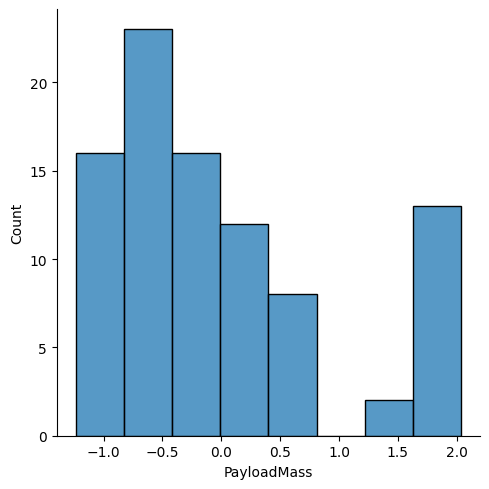

In [ ]:
sns.displot(data=X,x='PayloadMass')

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [ ]:
lr=LogisticRegression()
parameters={'C':[0.01,0.1,1],'penalty':["l2"],'solver':['lbfgs']}
logreg_cv=GridSearchCV(lr,parameters,cv=4)
logreg_cv.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [ ]:
print("tuned hyperparameteres:(best parameters)",logreg_cv.best_params_)

tuned hyperparameteres:(best parameters) {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}


Creating lists for collecting results

In [ ]:
accu=[]
methods=[]
accu.append(logreg_cv.score(X_test,y_test))
methods.append('logistic regression')
logreg_cv.score(X_test,y_test)

0.8888888888888888

In [ ]:
yhat=logreg_cv.predict(X_test)

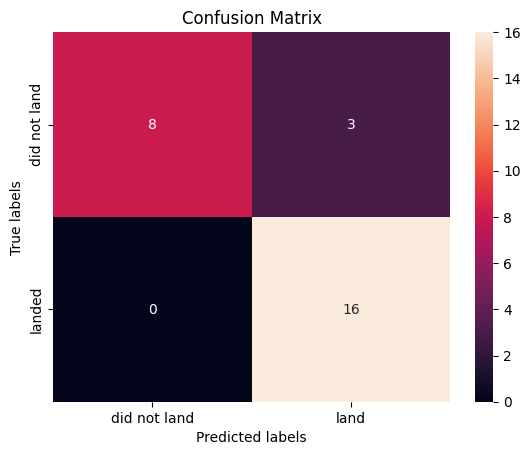

In [ ]:
plot_confusion_matrix(y_test,yhat)

Support Vector Machine

In [ ]:
parameters={'kernel':('linear','rbf','poly','rbf','sigmoid'),'C':(0.5,1,1.5)}

In [ ]:
svm=SVC()

In [ ]:
svm_cv=GridSearchCV(svm,parameters,cv=10)

In [ ]:
svm_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': (0.5, 1, 1.5),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [ ]:
print("tuned hyperparameteres:(best parameters)",svm_cv.best_params_)

tuned hyperparameteres:(best parameters) {'C': 1, 'kernel': 'sigmoid'}


In [ ]:
print('accuracy',svm_cv.best_score_)

accuracy 0.9380952380952381


In [ ]:
accu.append(svm_cv.score(X_test,y_test))

In [ ]:
methods.append('support vector machine')

In [ ]:
svm_cv.score(X_test,y_test)

0.8888888888888888

In [ ]:
yhat=svm_cv.predict(X_test)

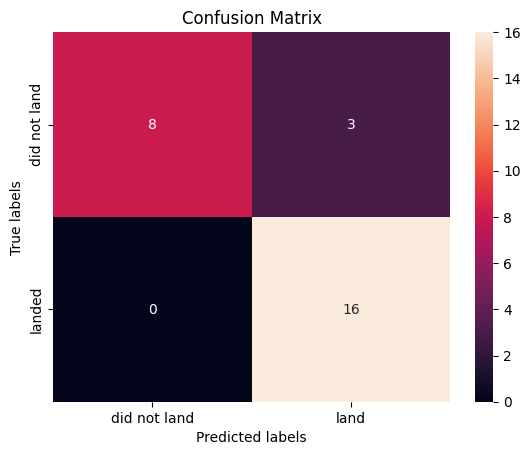

In [ ]:
plot_confusion_matrix(y_test,yhat)

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


tree = DecisionTreeClassifier()


param_grid = {
    "criterion": ['gini', 'entropy'],
    "splitter": ['best', 'random'],
    "max_depth": [2 * n for n in range(1, 10)],
    "max_features": ['log2', 'sqrt'],
    "min_samples_leaf": [1, 2, 4],
    "min_samples_split": [2, 5, 10]
}


tree_cv = GridSearchCV(tree, param_grid, cv=10)
tree_cv.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [ ]:
print("tuned hyperparameteres:(best parameters)",tree_cv.best_params_)

tuned hyperparameteres:(best parameters) {'criterion': 'gini', 'max_depth': 12, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}


In [ ]:
print('accuracy',tree_cv.best_score_)

accuracy 0.9690476190476189


In [ ]:
accu.append(tree_cv.score(X_test,y_test))

In [ ]:
methods.append('decisiontreeclassifier')

In [ ]:
tree_cv.score(X_test,y_test)

0.8888888888888888

In [ ]:
yhat=svm_cv.predict(X_test)

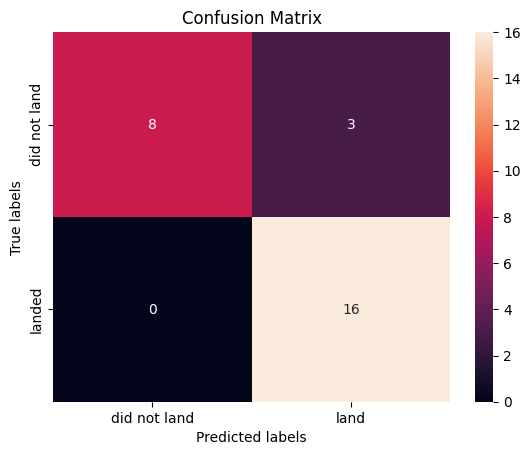

In [ ]:
plot_confusion_matrix(y_test,yhat)

K Nearest Neighbor

In [ ]:
parameters={'n_neighbors':[1,2,3,4,5,6,7,8,9,10],'algorithm':['auto','ball_tree','kd_tree','brute'],'p':[1,2]}

In [ ]:
KNN=KNeighborsClassifier()

In [ ]:
knn_cv=GridSearchCV(KNN,parameters,cv=10)

In [ ]:
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [ ]:
print("tuned hyperparameteres:(best parameters)",knn_cv.best_params_)

tuned hyperparameteres:(best parameters) {'algorithm': 'auto', 'n_neighbors': 6, 'p': 1}


In [ ]:
print('accuracy',knn_cv.best_score_)

accuracy 0.8928571428571429


In [ ]:
accu.append(knn_cv.score(X_test,y_test))

In [ ]:
methods.append('K Nearest Neighbors')

In [ ]:
knn_cv.score(X_test,y_test)

0.7777777777777778

In [ ]:
yhat=knn_cv.predict(X_test)

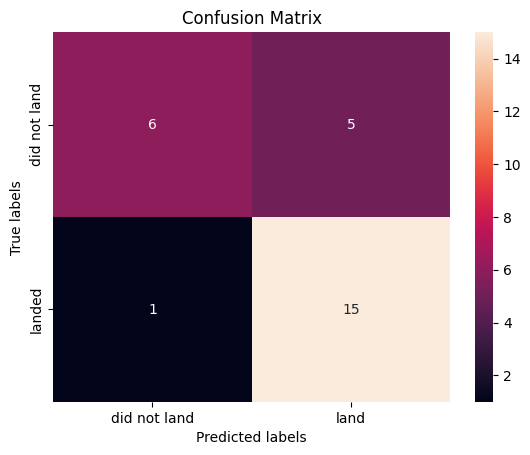

In [ ]:
plot_confusion_matrix(y_test,yhat)

The Best Performed Model

In [ ]:
print(methods)

['logistic regression', 'support vector machine', 'decisiontreeclassifier', 'K Nearest Neighbors']


In [ ]:
print(accu)

[0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.7777777777777778]


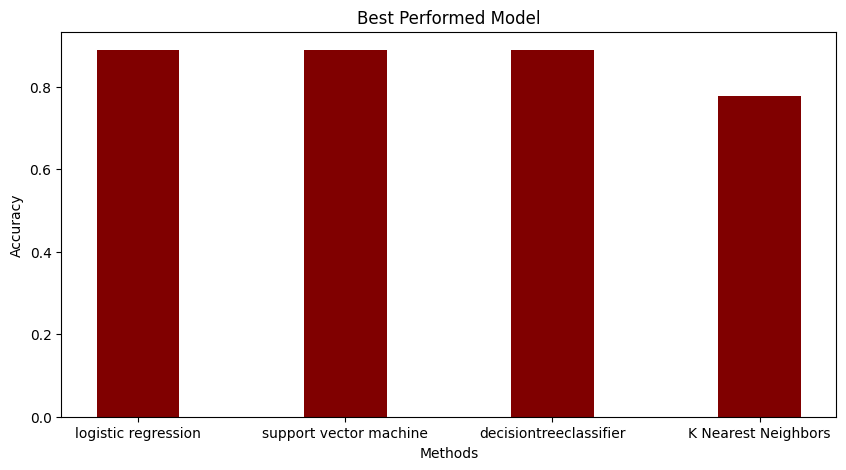

In [ ]:
fig=plt.figure(figsize=(10,5))
plt.bar(methods,accu,color='maroon',width=0.4)
plt.xlabel('Methods')
plt.ylabel('Accuracy')
plt.title('Best Performed Model')
plt.show()